# Fake News Detection (Assignement 5)

Giulia Ghisolfi, 664222

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Dataset Exploration

Import *Fake News* and *True News* datasets as pandas dataframes.

The data set is available at [Kaggle - Fake and real news dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset).

In [2]:
fake_news_dataset = pd.read_csv('Archive\Fake.csv', parse_dates=['date'], infer_datetime_format = True) # read Fake News Dataset
true_news_dataset = pd.read_csv('Archive\True.csv', parse_dates=['date'], infer_datetime_format = True) # read True News Dataset

In [3]:
display(fake_news_dataset)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
display(true_news_dataset)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22


## 1.1 Data Visualisation

To understand how the dataset is consisted, we visualize how many news are present in each subject for both datasets. For visualization purposes, the results are represented in a bar chart.

Text(0.5, 0, 'Number of News')

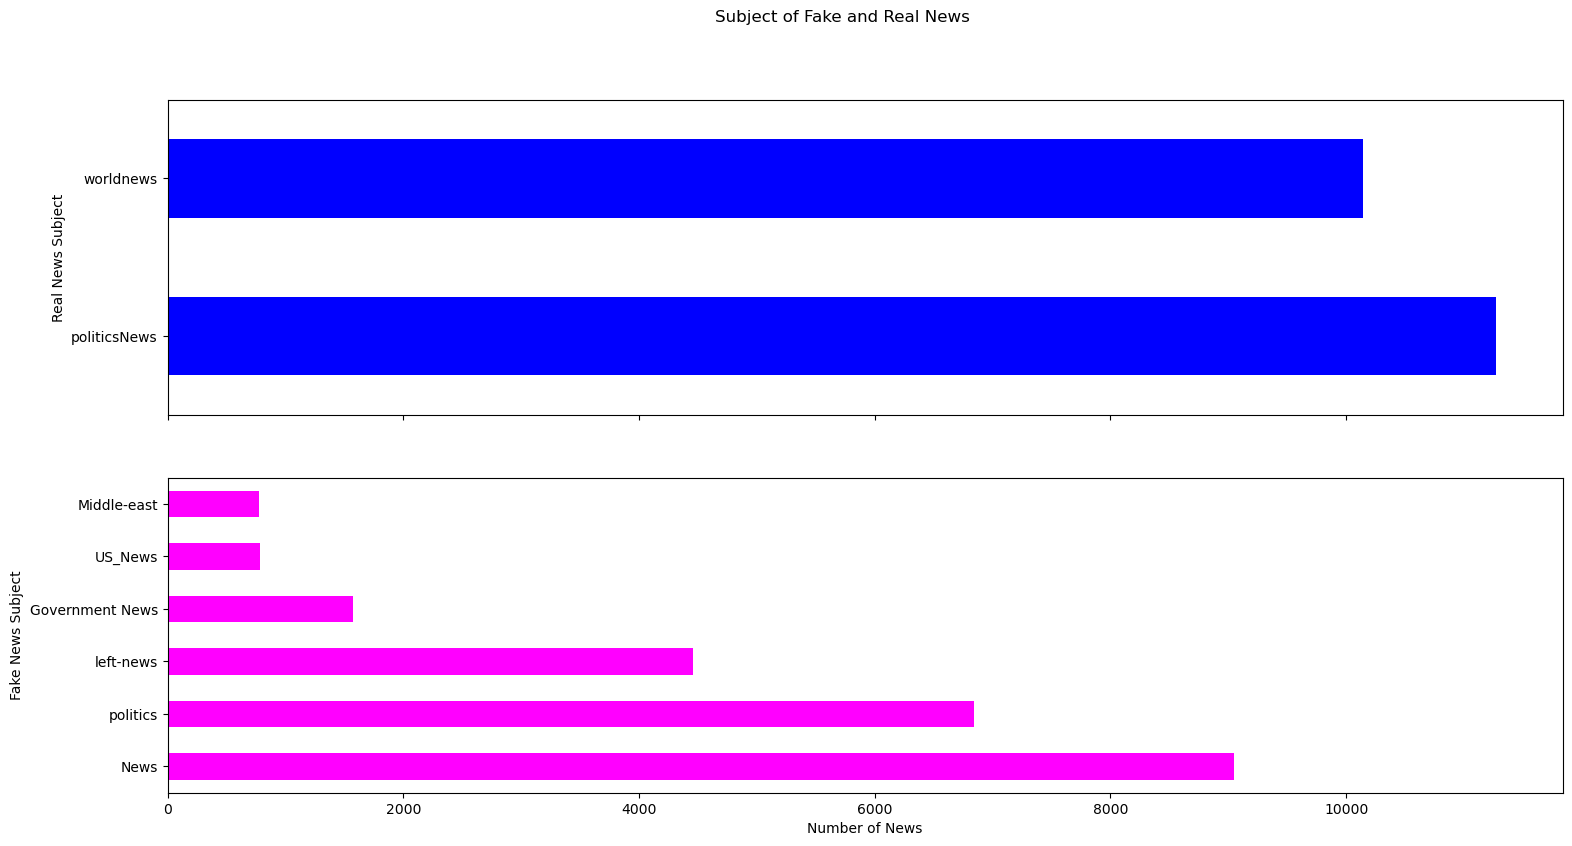

In [5]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(18,9), sharex=True)

true_news_dataset['subject'].value_counts().plot(ax=ax0, kind = "barh", color='blue')
fake_news_dataset['subject'].value_counts().plot(ax=ax1, kind = "barh", color='magenta')

plt.suptitle('Subject of Fake and Real News')
ax0.set_ylabel('Real News Subject')
ax1.set_ylabel('Fake News Subject')
ax1.set_xlabel('Number of News')


In [6]:
print(true_news_dataset['subject'].value_counts())

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


In [7]:
print(fake_news_dataset['subject'].value_counts())

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64


In [8]:
n_true = true_news_dataset['title'].count()
n_fake = fake_news_dataset['title'].count()

print('Number of Real News = %d' %n_true)
print('Number of Fake News = %d' %n_fake)

Number of Real News = 21417
Number of Fake News = 23481


In [9]:
print('Percentage of Real News for each subject:')
print(true_news_dataset['subject'].value_counts() / n_true)
print('\n')
print('Percentage of Fake News for each subject:')
print(fake_news_dataset['subject'].value_counts() / n_fake)

Percentage of Real News for each subject:
politicsNews    0.526311
worldnews       0.473689
Name: subject, dtype: float64


Percentage of Fake News for each subject:
News               0.385418
politics           0.291342
left-news          0.189898
Government News    0.066863
US_News            0.033346
Middle-east        0.033133
Name: subject, dtype: float64


## 1.2 Split Dataset in Train and Test Set

Since in the real world the number of fake news is lower than that of real news, the training set will be composed of approximately 70% true news and 30% fake news.

The validation set will instead be balanced, with 50% fake and 50% real news.

The validation set will be 20% of the total news used and the training set will be 80%.

Both in the training set and in the validation set, the number of news belonging to each subject is balanced.

Below, the reduced dataset for Fake News is extracted and the total news is divided into the training and test set.

In [10]:
true_subjects = true_news_dataset['subject'].unique().tolist()
test_true = pd.DataFrame(columns=['title', 'text', 'subject', 'date']) 
train_true = pd.DataFrame(columns=['title', 'text', 'subject', 'date']) 

for sub in true_subjects:
    data = true_news_dataset.where(true_news_dataset['subject'] == sub).dropna()
    n_test = int(0.2 * data['title'].count())
    test_true = pd.concat([test_true, data.iloc[:n_test,:]], ignore_index=True, sort=False)
    train_true = pd.concat([train_true, data.iloc[n_test:,:]], ignore_index=True, sort=False)

In [11]:
fake_subjects = fake_news_dataset['subject'].unique().tolist()
test_fake = pd.DataFrame(columns=['title', 'text', 'subject', 'date']) 
train_fake = pd.DataFrame(columns=['title', 'text', 'subject', 'date'])

n_test_tot = test_true['title'].count() # create a balanced test set
percentage_each_sub = fake_news_dataset['subject'].value_counts() / n_fake

for i, sub in enumerate(fake_subjects):
    data = fake_news_dataset.where(fake_news_dataset['subject'] == sub).dropna().sample(frac=0.5151, random_state=1)
    n_test = int(n_test_tot * percentage_each_sub[i])
    test_fake = pd.concat([test_fake, data.iloc[:n_test,:]], ignore_index=True, sort=False)
    train_fake = pd.concat([train_fake, data.iloc[n_test:,:]], ignore_index=True, sort=False)

In [12]:
print('Number of Real News in the Test Set = %d' %(test_true['title'].count()))
print('Number of Fake News in the Test Set = %d' %(test_fake['title'].count()))
print('\n')
print('Number of Real News in the Train Set = %d' %(train_true['title'].count()))
print('Number of Fake News in the Train Set = %d' %(train_fake['title'].count()))

Number of Real News in the Test Set = 4283
Number of Fake News in the Test Set = 4275


Number of Real News in the Train Set = 17134
Number of Fake News in the Train Set = 7821


# 2. Data Preprocessing

The underlying code represents the preprocessing process on the initial dataset.

## 2.1 Text preprocessing

In this first part, the text was prepared to be tokenized and become the feature of the final dataset. \
The features used are the title and text of each article.
Subsequently, label 0 was added for articles belonging to the Fake News class, and 1 for the Real News class.

The data preprocessing on the features was done by following these steps:
- **Remove punctuations**: use RegEx library to recognize punctuation and remove it from text.
- **Remove digit**: use RegEx library to recognize digit and remove it from text.
- **Remove stopwords**: use the stop words list provided by NLTK to recognize stop words and remove them from text.
- **Lemmatize**: use NLTK Lemmatizer object to replace each text word with its lemma if it's found in WordNet.
- **Stemming**: use NLTK Stemmer object to replace each text word with its word steam.
- **Convert lowercase**: use lower() method to convert all words in the text in lowercase.
- **Expand contractions**: use contractions library to replace each contracted text word with words from which it is formed.

In [13]:
import nltk
import re # python library to recoginze punctuation and digit
import contractions # python library to recoginze contractions

import pickle

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
stop_words = stopwords.words('english') # load english stop words to recognize it in text
lemmatizer = WordNetLemmatizer() # create Lemmatizer object
stemmer = PorterStemmer() # create Stemmer object

def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_digit(text):
    return re.sub('\d+', '', text)

def remove_stopwords(text):
    return ' '.join([word for word in nltk.word_tokenize(text) if word not in stop_words])

def lemmatize(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

def stemming(text):
    return ' '.join(stemmer.stem(word) for word in text.split())

def convert_lowercase(text):
    return text.lower()

def expand_contractions(text):
    return ' '.join(contractions.fix(word) for word in text.split())

In [15]:
Fake_label = 0 # class 0: fake news
Real_label = 1 # class 1: real news

def text_preprocessing(text):
    text = remove_punctuations(text)
    text = remove_digit(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = stemming(text)
    text = convert_lowercase(text)
    text = expand_contractions(text)

    return text


def dataframe_preprocessing(df_true, df_fake):
    df_true['label'] = Real_label # add a column for the label class
    df_fake['label'] = Fake_label

    df = pd.concat([df_true, df_fake], ignore_index=True, sort=False) # merge datasets
    df['text'] = df['title'] + df['text'] # unify title and text
    df.drop(['title', 'subject', 'date'], axis=1, inplace=True) # delete title, subject and date columns

    # text preprocessing
    df['text'] = df['text'].apply(text_preprocessing)

    # shuffle rows
    df = df.sample(frac=1).reset_index(drop=True)

    return df

The preprocessed dataframes containing the features in the 'text' column and the labels representing the class of each article belonging to the test and train sets were saved as pickle files.

In [16]:
def save_processed_df(filename, df_true, df_fake):
    df = dataframe_preprocessing(df_true, df_fake)

    with open(filename, 'wb') as file:
                pickle.dump([df], file)

def load_processed_df(filename):
    with open(filename, 'rb') as file:
        [df] = pickle.load(file)

    return df

In [17]:
#save_processed_df(filename='pickles/test_set_df.pkl', df_true=test_true, df_fake=test_fake)
#save_processed_df(filename='pickles/train_set_df.pkl', df_true=train_true, df_fake=train_fake)

In [18]:
test_set_df = load_processed_df(filename='pickles/test_set_df.pkl')
train_set_df = load_processed_df(filename='pickles/train_set_df.pkl')

In [19]:
display(test_set_df)
display(train_set_df)

,text,label
0,that moment conserv star milo yiannopoulo said...,0
1,one crucial detail on budweis new patriot beer...,0
2,the babi part video peopl just got the worst n...,0
3,a must read obama treason goe into overdriveou...,0
4,whi american should care that facebook ceo is ...,0
...,...,...
8553,california lawmak consid spend billion fix hou...,1
8554,the satan templ troll antiabort fanat into stu...,0
8555,obama lie expos new info shut down obama claim...,0
8556,poland pm design say continu fight tax evasion...,1


,text,label
0,nepal hold final round municip poll ethnic gri...,1
1,kuwait ruler accept cabinet resign state news ...,1
2,new york time boost spend trump coverag amid b...,1
3,ladi in red watch presid trump our stun first ...,0
4,boe ceo say assur trump air forc one costspalm...,1
...,...,...
24950,break updat dead injur after us citizen muslim...,0
24951,yale psychiatrist issu dire warn of the danger...,0
24952,mexico say way pay trump wallmexico citi reute...,1
24953,trump warn american wed be sick of winningcnn ...,0


In [20]:
display(test_set_df.iloc[0]['text'])

'that moment conserv star milo yiannopoulo said it ok for older men to have sex with children videoif yet heard altright mean nazi scumbag milo yiannopoulo headlin annual stupid peopl convent cpac year but know total think ok grown men fck kid we get hung sort child abus stuff point heavili polic consensu adult yiannopoulo heard say recentlysurfac video give controversi viewpoint grown men sex middl schooler perfectli normal accept in homosexu world particularli relationship younger boy older men sort come age relationship relationship older men help young boy discov give secur safeti provid love reliabl sort rock speak parent to clear may yiannopoulo consid normal homosexu world anywher els it sound like molest unnam person repli it sound like cathol priest molest but know i grate father michael i give nearli good head yiannopoulo joke funni joke molest child appar he went explain relationship pedophilia yearold child sexual matur ad relationship huge posit experi kid in interview yia

## 2.2 Text tokenization

The Keras Tokenizer object was used to convert the text into a numerical sequence, and the results were stored in a NumPy object.

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

In [22]:
def text_tokenization(train_text, test_text):
    tokenizer = Tokenizer(num_words=10000)

    tokenizer.fit_on_texts(train_text)
    tokenizer.fit_on_texts(test_text)
    
    # convert text to sequence
    train_sequence = tokenizer.texts_to_sequences(train_text)
    test_sequence = tokenizer.texts_to_sequences(test_text)
    
    # padding
    max_len = max(len(line) for line in (train_sequence + test_sequence))
    train_sequence = [np.pad(line, (0, max_len-len(line)), 'constant', constant_values=(0)) 
                      for line in train_sequence]
    test_sequence = [np.pad(line, (0, max_len-len(line)), 'constant', constant_values=(0)) 
                     for line in test_sequence]

    return tokenizer, np.array(train_sequence), np.array(test_sequence)

In [23]:
tokenizer, X_train, X_test = text_tokenization(train_set_df['text'], test_set_df['text']) 

y_train = np.asarray(train_set_df['label'])
y_test = np.asarray(test_set_df['label'])

In [24]:
print(X_train.shape)
print(y_train.shape)

(24955, 3338)
(24955,)


## 2.3 Reducing Features Dimension

Since the resulting NumPy objects had very large dimensions, which would have made the training phase very slow, their dimensions were reduced.

### 2.3.1 Visualizing Non-Zero Feature Elements

Below, the number of non-zero elements in each feature of the Test and Train sets are visualized through a histogram. As can be seen, the majority of the samples have less than 1000 non-zero elements.

Text(0.5, 1.0, 'Test Set')

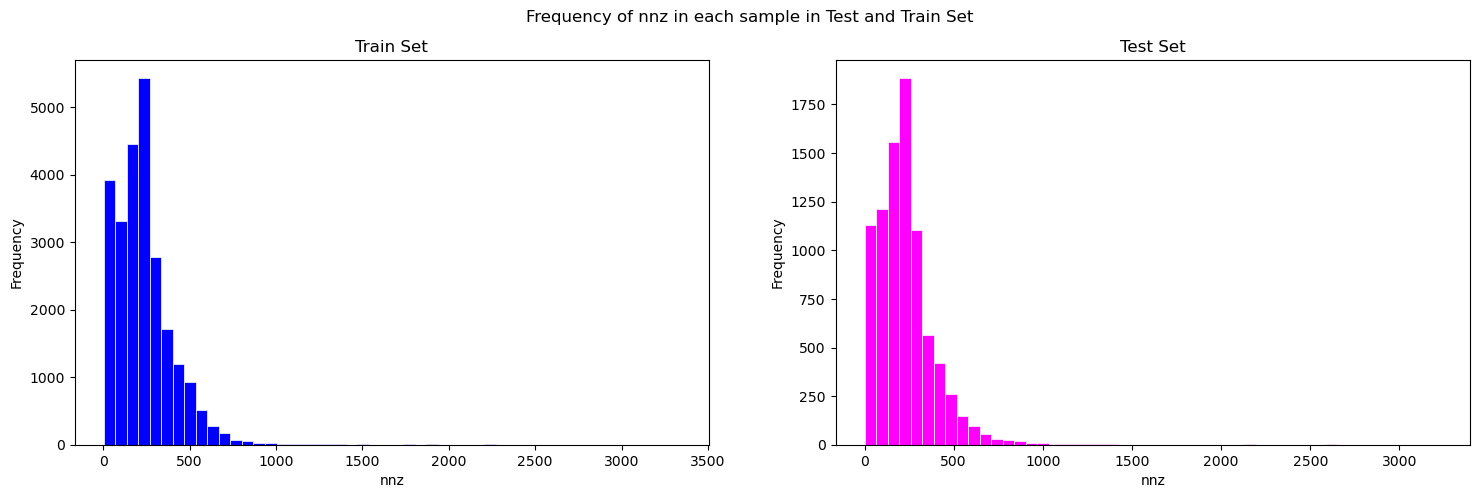

In [25]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,5))
ax0.hist(np.count_nonzero(X_train, axis=1), bins=50, linewidth=0.5, edgecolor="white", color="blue")
ax1.hist(np.count_nonzero(X_test, axis=1), bins=50, linewidth=0.5, edgecolor="white", color="magenta")

plt.suptitle('Frequency of nnz in each sample in Test and Train Set')
ax0.set_xlabel('nnz')
ax1.set_xlabel('nnz')
ax0.set_ylabel('Frequency')
ax1.set_ylabel('Frequency')
ax0.set_title('Train Set')
ax1.set_title('Test Set')

In [26]:
print("Percentage of nnz in Train Set: %.4f%%" %(np.count_nonzero(X_train) / (X_train.shape[0] * X_train.shape[1]) * 100))
print("Percentage of nnz in Test Set: %.4f%%" %(np.count_nonzero(X_test) / (X_test.shape[0] * X_test.shape[1]) * 100))

Percentage of nnz in Train Set: 7.0781%
Percentage of nnz in Test Set: 6.8738%


In order to visualize the sparsity pattern of the Train and Test sets, the non-zero values of the features are plotted below. \
Note that the plot is of the transposed matrixs.

Text(0.5, 1.0, 'Spy Transposed Test Set')

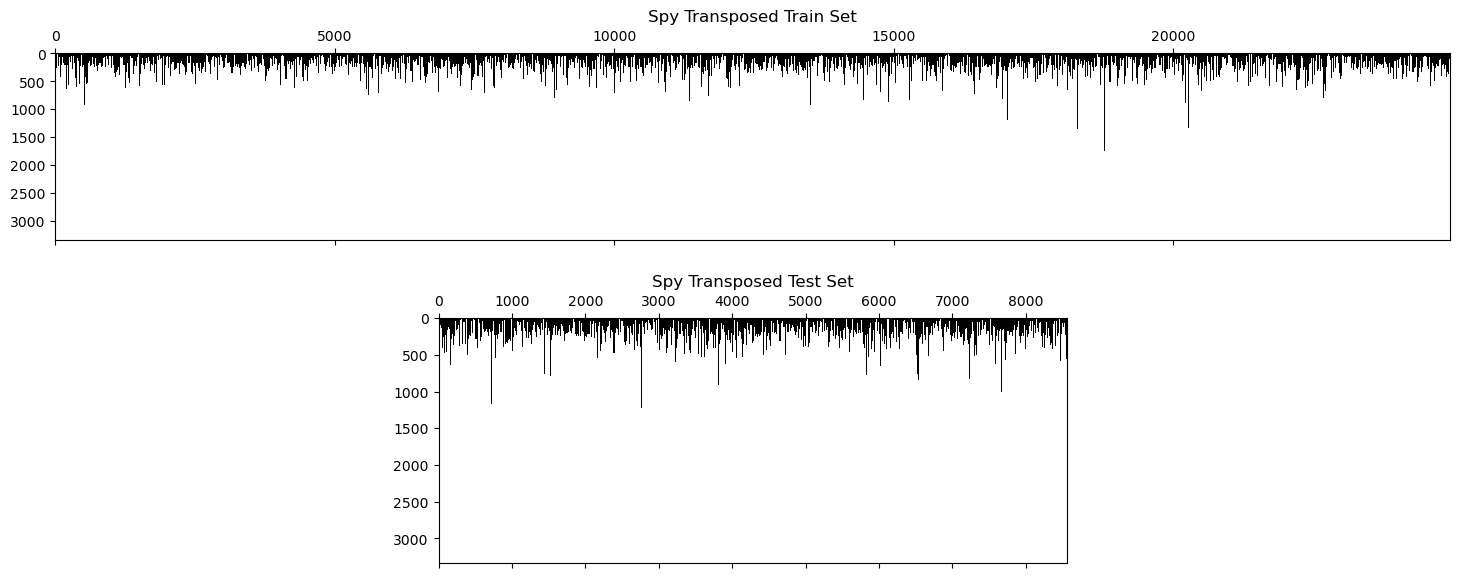

In [27]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(18,7))

ax0.spy(X_train.T)
ax1.spy(X_test.T)

ax0.set_title('Spy Transposed Train Set')
ax1.set_title('Spy Transposed Test Set')

### 2.3.2 Reducing Features Dimension

Noting that the great part of the non-zero values is located in the first columns either in the Train Set and in the Test Set, one can delete the last columns in order to reduce the dimension of the dataset.

This approach was chosen, compared to other methods of reducing the size of the metrics, after conducting some preliminary tests during the model training phase. It was observed that the validation accuracy did not significantly decrease, while the computation time was reduced.

In [28]:
max_len_features = 1200
X_train_reduced = X_train[:, :max_len_features]
X_test_reduced = X_test[:, :max_len_features]

For visualization purposes, the percentage of non-zero values in the reduced set and the sparsity pattern plot are visualized below.

In [29]:
print("Percentage of nnz in Reduced Train Set: %.4f%%" %(np.count_nonzero(X_train_reduced) / (X_train_reduced.shape[0] 
                                                            * X_train_reduced.shape[1]) * 100))
print("Percentage of nnz in Reduced Test Set: %.4f%%" %(np.count_nonzero(X_test_reduced) / (X_test_reduced.shape[0] 
                                                            * X_test_reduced.shape[1]) * 100))

Percentage of nnz in Reduced Train Set: 19.5488%
Percentage of nnz in Reduced Test Set: 18.9757%


Text(0.5, 1.0, 'Spy Transposed and Reduced Train Set')

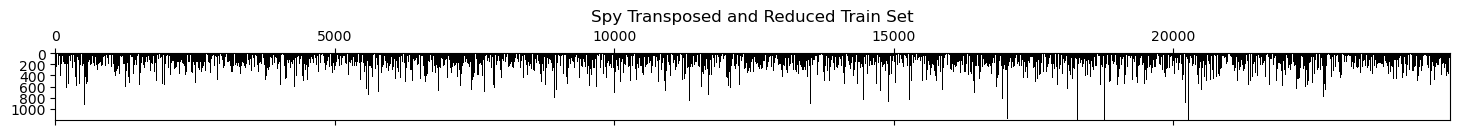

In [30]:
plt.figure(figsize=(18,7))

plt.spy(X_train_reduced.T)
plt.title('Spy Transposed and Reduced Train Set')

Text(0.5, 1.0, 'Spy Transposed and Reduced Test Set')

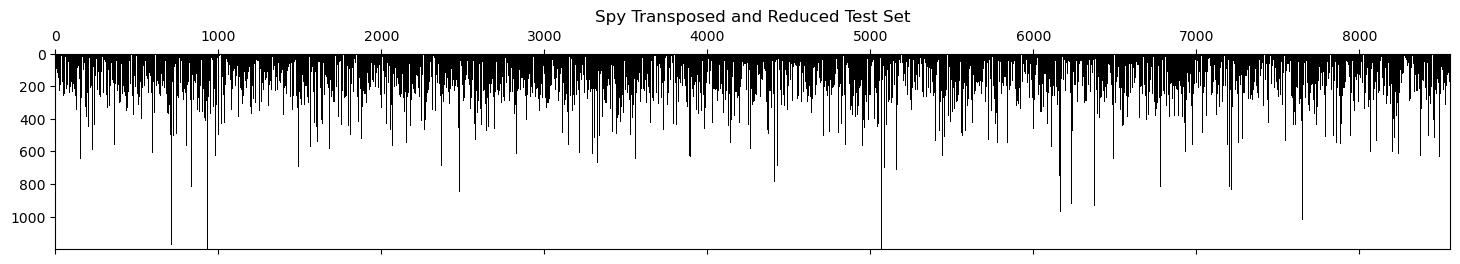

In [31]:
plt.figure(figsize=(18,7))

plt.spy(X_test_reduced.T)
plt.title('Spy Transposed and Reduced Test Set')

## 2.4 Pre-trained Embedding

In the final stage of the data pre-processing, a pre-processed GloVe embedding model with a dimension of 50, provided from the "The Stanford NLP Group" and downloaded from [here](http://nlp.stanford.edu/data/glove.6B.zip), was utilized.

Only the vectors corresponding to the words present in the word index vocabulary of the Keras tokenizer initialized earlier were saved in the embedding matrix.

This part of the code was written using the code in this [GitHub](https://gist.github.com/tanmay17061)

In [32]:
import zipfile

In [33]:
def dowload_embeddings():
    # Download pre-trained GloVe embeddings
    !python -m wget http://nlp.stanford.edu/data/glove.6B.zip

    file = 'glove.6B.zip'

    # Unzip file
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('data')

In [34]:
def compute_glove_embeddings(emb_dimension, tokenizer):
    # Parse the vocabulary and embeddings
    vocab, embed_matrix = [], []
    with open('data/glove.6B.%dd.txt' %emb_dimension,'rt') as file:
        full_content = file.read().strip().split('\n')
    for i in range(len(full_content)):
        i_word = full_content[i].split(' ')[0]
        i_embeddings = [float(val) for val in full_content[i].split(' ')[1:]]
        vocab.append(i_word) # list of word
        embed_matrix.append(i_embeddings) # list of embeddings
    
    # Convert embed_matrix in numpy array
    embed_matrix = np.array(embed_matrix)

    id_to_word = tokenizer.word_index # load word index vocabolary

    # create embeddings matrix
    glove_embeddings = []
    for word in id_to_word:
        try:  
            i = vocab.index(word)
            glove_embeddings.append(embed_matrix[i])
        except: pass

    return np.array(glove_embeddings)

The embedding matrix is saved in a pickle file.

In [35]:
def save_embeddings(tokenizer, emb_dimension):
    dowload_embeddings()
    glove_embeddings = compute_glove_embeddings(tokenizer=tokenizer)

    filename = 'pickles/glove_%dd.pkl' %(emb_dimension)
    with open(filename, 'wb') as file:
                pickle.dump([glove_embeddings], file)

def load_embeddings(emb_dimension):
    filename = 'pickles/glove_%dd.pkl' %(emb_dimension)
    with open(filename, 'rb') as file:
        [glove_embeddings] = pickle.load(file)
    
    return glove_embeddings

In [36]:
emb_dimension = 50
#save_embeddings(tokenizer=tokenizer, emb_dimension=emb_dimension)

In [37]:
glove_embeddings = load_embeddings(emb_dimension=emb_dimension)

# 3. Model's Architecture

## 3.1 Model's Architecture

Based on the papers linked below, the selected model architecture was a Bi-directional LSTM-Recurrent Neural Network, which appears to be the optimal choice for solving the fake news classification task.

The model was implemented using the Keras library, which provides the ability to implement bidirectional layers and embedding layers.

The model is implemented in a sequential manner and comprises of the following layers:
- **Input layer**: embedding layer uses a pre-trained GloVe embedding matrix. This choice was suggested the papers.
- **Hidden layers**: consists of a user-specified number of Bi-directional LSTM layers, each having a specified number of units.
- **Output layer**: comprises of a dense layer with a single unit, and uses a sigmoid activation function.

The model was implemented so that a number of steps were taken at each epoch, allowing the model to see a portion of the input training set equal to 30% at each epoch. This approach made the training process faster. The Keras library ensures that the data that the model did not see in an epoch are shown in the subsequent ones, so by the end of the training phase, the model has seen all the examples multiple times.

The loss function used is binary cross-entropy, with the Adam optimizer and accuracy as the evaluation metric.

The size of the training set used for validation is customizable, and early stopping is implemented based on the validation set loss. Mini-batch size is also customizable, and dropout regularization is implemented with a user-customizable percentage of dropped units.

Source: \
[Detection of fake news using deep learning CNN–RNN based methods](https://www.sciencedirect.com/science/article/pii/S2405959521001375#sec6), I. K. Sastrawan, I. P. A. Bayupati, D. M. S. Arsa \
[Fake News Detection using Bi-directional LSTM-Recurrent Neural Network](https://www.sciencedirect.com/science/article/pii/S1877050920300806),
P. Bahad, P. Saxena, R. Kamal

In [38]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Bidirectional, Dense, Embedding, LSTM
from tensorflow.keras.saving import load_model, save_model

In [39]:
class Bidirectional_LSTM:
    def __init__(self, X_train, y_train, embeddings_matrix, n_hidden_units=[10, 20, 10], dropuot_fraction=0.3, 
                 epochs=500, batch_size=200, validation_fraction=0.2):
        self.X_train = X_train
        self.y_train = y_train
        self.embeddings_matrix = embeddings_matrix

        self.n_hidden_units = n_hidden_units
        self.dropuot_fraction = dropuot_fraction
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_fraction = validation_fraction

        self.__init_model()

    def __init_model(self):
        # Bidirectional LSTM
        self.model = Sequential(name='Bidirectional_LSTM')
        
        # input layer
        self.model.add(Embedding(input_dim=self.embeddings_matrix.shape[0],
                            output_dim=self.embeddings_matrix.shape[1],
                            embeddings_initializer=Constant(self.embeddings_matrix),
                            mask_zero=True,
                            sparse=False))

        # hidden layer
        for n_units in self.n_hidden_units[:-1]:
            self.__add_bidirectional_layer(n_units, return_sequences=True)
        
        self.__add_bidirectional_layer(self.n_hidden_units[-1], return_sequences=False)

        # output layer
        self.model.add(Dense(units=1,
                        activation='sigmoid'))
        
        self.model.compile(loss='binary_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy'])
    
    def __add_bidirectional_layer(self, n_units, return_sequences):
        # forward layer
        forward = LSTM(units=n_units,
                    activation="tanh",
                    recurrent_activation="sigmoid",
                    dropout=self.dropuot_fraction,
                    recurrent_dropout=self.dropuot_fraction,
                    return_sequences=return_sequences)
            
        # backward layer
        backward = LSTM(units=n_units,
                    activation="tanh",
                    recurrent_activation="sigmoid",
                    dropout=self.dropuot_fraction,
                    recurrent_dropout=self.dropuot_fraction,
                    return_sequences=return_sequences,
                    go_backwards=True)

        self.model.add(Bidirectional(forward, backward_layer=backward))

    def train(self):
        # early_stopping
        callbacks = EarlyStopping(monitor="val_loss",
                                min_delta=1e-12,
                                patience=2,
                                verbose=0,
                                mode="auto",
                                baseline=None,
                                restore_best_weights=False,
                                start_from_epoch=0)

        steps_per_epoch = int(self.X_train.shape[0] * 0.3 / self.batch_size)

        self.history = self.model.fit(x=np.array(self.X_train),
                                y=np.array(self.y_train),
                                batch_size=self.batch_size,
                                epochs=self.epochs,
                                verbose="auto",
                                callbacks=[callbacks],
                                validation_split=self.validation_fraction, # validation size
                                shuffle=True,
                                steps_per_epoch=steps_per_epoch).__dict__
        
        self.accuracy = self.model.evaluate(x=self.X_train,
                                y=self.y_train,
                                batch_size=self.batch_size,
                                verbose="auto",
                                return_dict=False) # metric return as a list
    
    def show_learning_curve(self):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        # error
        ax1.plot(self.history['history']['loss'], label="Training error", color="red")
        if self.validation_fraction > 0:
            ax1.plot(self.history['history']['val_loss'], label="Validation error", color="blue")

        ax1.legend()
        ax1.grid()
        ax1.set(xlabel="Epochs", ylabel="Reconstruction Errors (binary crossentropy)")
        ax1.set_title("Reconstruction Errors")
        
        # accuracy
        ax2.plot(self.history['history']['accuracy'], label="Training accuracy", color="red")
        if self.validation_fraction > 0:
            ax2.plot(self.history['history']['val_accuracy'], label="Validation accuracy", color="blue")

        ax2.legend()
        ax2.grid()
        ax2.set(xlabel="Epochs", ylabel="Accuracy")
        ax2.set_title("Accuracy")

    def predict(self, X_test, batch_size=None):
        return np.where(self.model.predict(X_test, batch_size=batch_size) < 0.5, 0, 1)
    
    def compute_prediction_score(self, X_test, y_test, evaluation_metric='accuracy', batch_size=None):
        return self.model.evaluate(X_test, y_test, batch_size=batch_size, return_dict=True)[evaluation_metric]

    def save_model_history(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump([self.history['history'], self.accuracy], file)

In [40]:
def load_model_history(filename):    
    with open(filename, 'rb') as file:
        [history, accuracy] = pickle.load(file)
            
    return history, accuracy

## 3.2 Architecture Selection

The model selection process involved training four different models with varying hyperparameters. 

The number of hidden layers ranged from 1 to 3, and each layer had between 1 and 5 units. 
A drop-out fraction of 10% or 20% of the total units was implemented. 
The validation set was 20% of the training set, and the batch size was set to 256. 
Each model was trained for 8 epochs.

This architecture was chosen after some preliminary trials, where it was noted that between 4 and 5 total units in the hidden layers were sufficient to achieve an accuracy greater than 90% after the first few epochs.

After training, the accuracy and loss on the training and validation set were saved for each model in a pickle file.
The final model selection phase lasted approximately four hours.

In [41]:
def model_selection(models, n_models, X_train, y_train, embeddings_matrix):

    for i in range(n_models):
        model = Bidirectional_LSTM(X_train, y_train, embeddings_matrix=embeddings_matrix, 
                                   n_hidden_units=models["n_hidden_units"][i], 
                                   dropuot_fraction=models["dropuot_fraction"][i],
                                   epochs=models["epochs"][i], batch_size=models["batch_size"][i])
        
        model.train()

        filename = ('models/model_%d.pkl' %i)
        model.save_model_history(filename)

        print("Model %d/%d saved" %(i+1, n_models))
        

In [42]:
models = {"n_hidden_units": [[2, 2], [1, 2, 1], [2, 3], [5]],
                "dropuot_fraction": [0.1, 0.1, 0.2, 0.2],
                "epochs": [8, 8, 8, 8],
                "batch_size": [256, 256, 256, 256]}

n_models = 4

#model_selection(models, n_models, X_train_reduced, y_train, embeddings_matrix=glove_embeddings)

In [43]:
history_0, [eval_loss_0, eval_accuracy_0] = load_model_history('models/model_0.pkl')
history_1, [eval_loss_1, eval_accuracy_1] = load_model_history('models/model_1.pkl')    
history_2, [eval_loss_2, eval_accuracy_2] = load_model_history('models/model_2.pkl')    
history_3, [eval_loss_3, eval_accuracy_3] = load_model_history('models/model_3.pkl')    


### Model Selection Results

Below are the hyperparameters and corresponding accuracy and loss on validation set for each model. \
Model 3, with a single hidden layer of 5 units, performed the best. 

Learning curves for all models are plotted below.

In [44]:
models_df = pd.DataFrame(models)
models_df['validation accuracy'] = [history_0['val_accuracy'][-1], history_1['val_accuracy'][-1],
                                    history_2['val_accuracy'][-1], history_3['val_accuracy'][-1]]
models_df['validation loss'] = [history_0['val_loss'][-1], history_1['val_loss'][-1],
                                    history_2['val_loss'][-1], history_3['val_loss'][-1]] 
models_df = models_df.drop('epochs', axis=1)                              
models_df.insert(loc=0, column='Model', value=['Model 0', 'Model 1', 'Model 2', 'Model 3'])

display(models_df)

,Model,n_hidden_units,dropuot_fraction,batch_size,validation accuracy,validation loss
0,Model 0,"[2, 2]",0.1,256,0.943098,0.252087
1,Model 1,"[1, 2, 1]",0.1,256,0.967341,0.357733
2,Model 2,"[2, 3]",0.2,256,0.952715,0.187402
3,Model 3,[5],0.2,256,0.970948,0.103547


In [45]:
def axs_learning_curve(ax1, ax2, loss, val_loss, accuracy, val_accuracy, i):
    #loss
    ax1.plot(loss, "--or", label="Training error")
    ax1.plot(val_loss, "--ob", label="Validation error")

    ax1.legend()
    ax1.grid()
    ax1.set(xlabel="Epochs")
    ax1.set_title("Model %d: Reconstruction Errors" %i)

    # accuracy
    ax2.plot(accuracy, "--or", label="Training accuracy")
    ax2.plot(val_accuracy, "--ob", label="Validation accuracy")

    ax2.legend()
    ax2.grid()
    ax2.set(xlabel="Epochs")
    ax2.set_title("Model %d: Accuracy" %i)

    return ax1, ax2


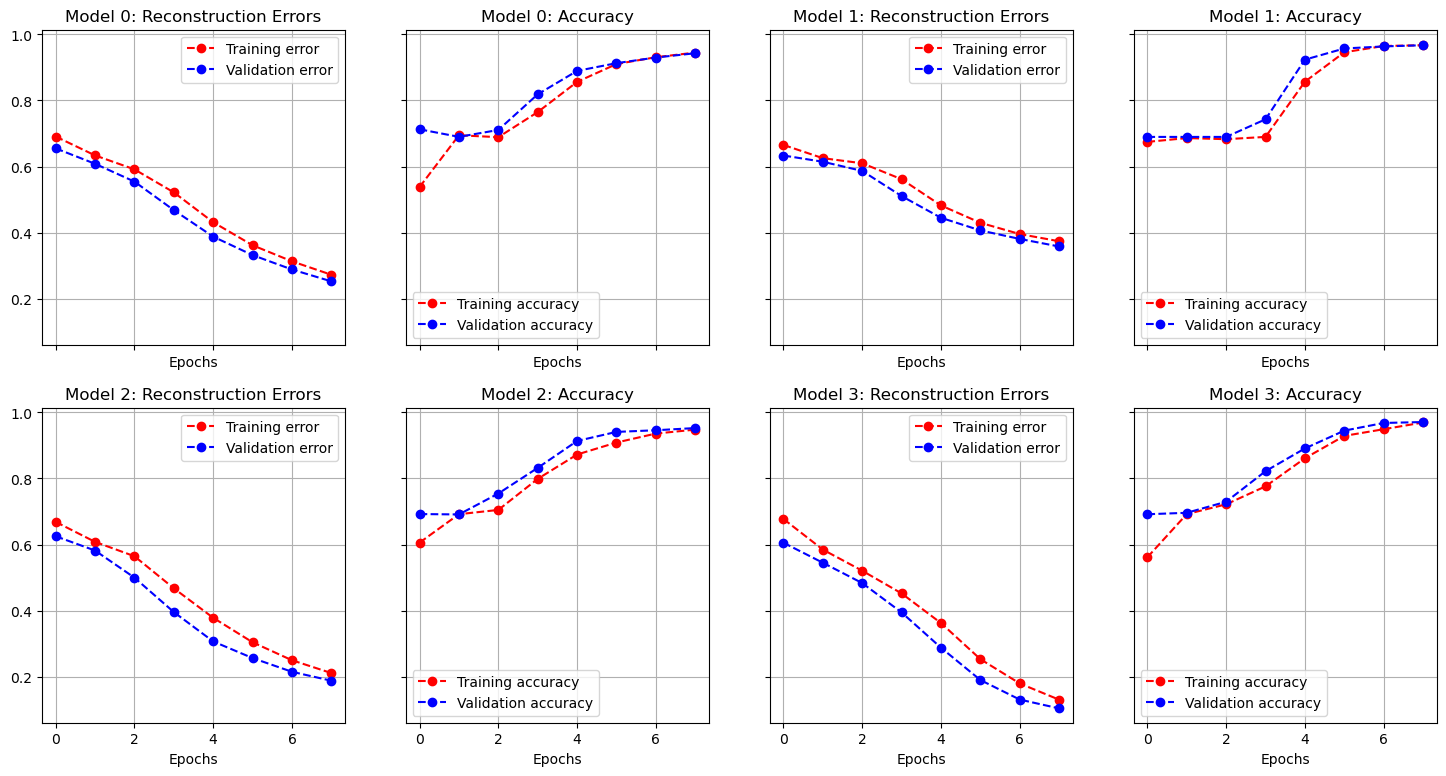

In [46]:
fig, axs = plt.subplots(2, 4, figsize=(18,9), sharex=True, sharey=True)

axs[0,0], axs[0,1] = axs_learning_curve(axs[0,0], axs[0,1], history_0['loss'], 
                    history_0['val_loss'], history_0['accuracy'], history_0['val_accuracy'], 0)

axs[0,2], axs[0,3] = axs_learning_curve(axs[0,2], axs[0,3], history_1['loss'], 
                    history_1['val_loss'], history_1['accuracy'], history_1['val_accuracy'], 1)

axs[1,0], axs[1,1] = axs_learning_curve(axs[1,0], axs[1,1], history_2['loss'], 
                    history_2['val_loss'], history_2['accuracy'], history_2['val_accuracy'], 2)

axs[1,2], axs[1,3] = axs_learning_curve(axs[1,2], axs[1,3], history_3['loss'], 
                    history_3['val_loss'], history_3['accuracy'], history_3['val_accuracy'], 3)


The model number 3 has the highest accuracy and the lowest loss among the four models considered.

## 3.3 Prediction on Test Set

The selected model was retrained for 20 epochs, and predictions were made on the Test Set.
The learning curves are shown below.

The final training phase lasted approximately 130 minutes.

The accuracy and loss for each epoch, along with the final predictions on the Test Set, were saved in pickle files.

In [47]:
def train_final_model():    
    final_model = Bidirectional_LSTM(X_train_reduced, y_train, embeddings_matrix=glove_embeddings, n_hidden_units=[5], 
                            dropuot_fraction=0.2, epochs=20, batch_size=256)
            
    final_model.train()

    # save model history
    final_model.save_model_history('models/final_model.pkl')

    # compute and save prediction on Test Set
    predictions = final_model.predict(X_test) 
    predictions_accuracy = final_model.compute_prediction_score(X_test, y_test, evaluation_metric='accuracy')

    filename = 'predictions/predictions.pkl'
    with open(filename, 'wb') as file:
        pickle.dump([predictions, predictions_accuracy], file)

    # compute and save continuous prediction on Test Set
    continuous_predictions = final_model.model.predict(X_test)

    filename = 'predictions/continuous_predictions.pkl'
    with open(filename, 'wb') as file:
        pickle.dump([continuous_predictions], file)

#train_final_model()

The final model was saved using the save_model method provided by Keras.

In [48]:
from tensorflow.keras.saving import save_model, load_model

# save final model
#save_model(final_model.model, filepath='final_model')

final_model = load_model('final_model')

In [49]:
history, [eval_loss, eval_accuracy] = load_model_history('models/final_model.pkl') 

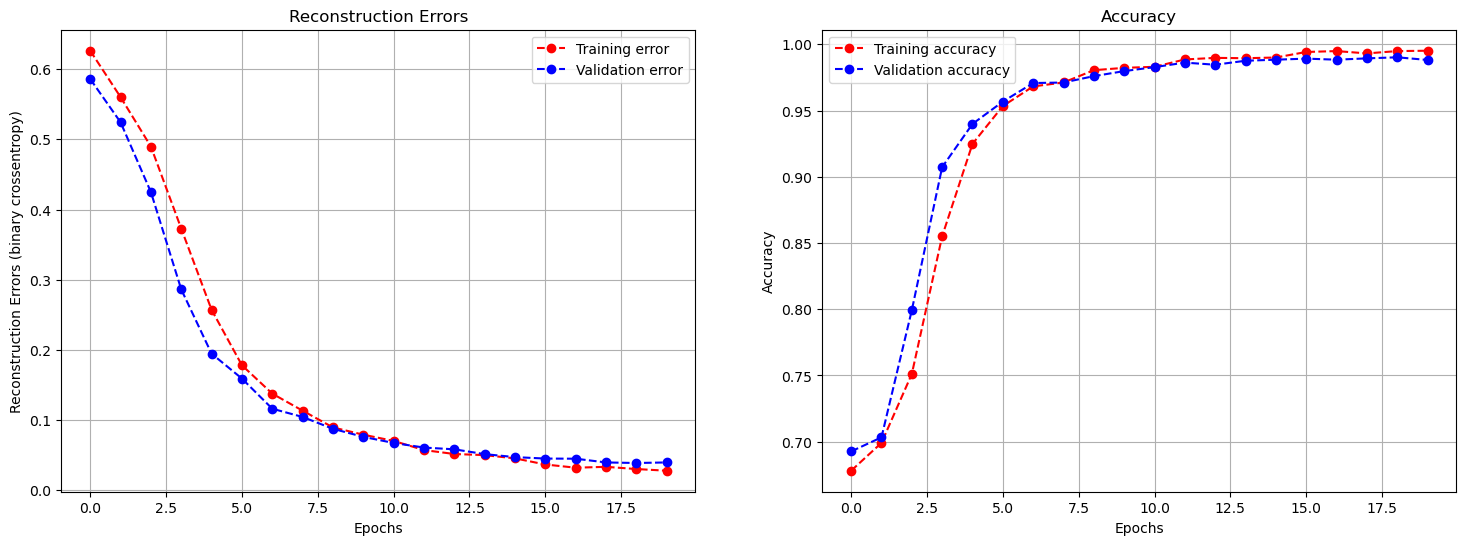

In [50]:
def show_learning_curve(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # error
    ax1.plot(history['loss'], "--or", label="Training error")
    ax1.plot(history['val_loss'], "--ob", label="Validation error")

    ax1.legend()
    ax1.grid()
    ax1.set(xlabel="Epochs", ylabel="Reconstruction Errors (binary crossentropy)")
    ax1.set_title("Reconstruction Errors")
        
    # accuracy
    ax2.plot(history['accuracy'], "--or", label="Training accuracy")
    ax2.plot(history['val_accuracy'], "--ob", label="Validation accuracy")

    ax2.legend()
    ax2.grid()
    ax2.set(xlabel="Epochs", ylabel="Accuracy")
    ax2.set_title("Accuracy")

show_learning_curve(history)

# 4. Results

## 4.1 Predictions on Balanced Test Set

The labels predicted on the test set are represented in the confusion matrix shown below.
The model achieved an accuracy of over 98% on a test set consisting of 8558 examples.

The final model's predictions classified labels using a threshold of 0.5 on the sigmoid output, which assigns equal probabilities to true and false labels.

As can be seen, most prediction errors occurred when falsely classifying labels as true. This was expected since the training was done on a dataset consisting of 70% real news examples and only 30% fake news, while the test set was balanced.

In [51]:
filename = 'predictions/predictions.pkl'
with open(filename, 'rb') as file:
    [predictions, predictions_accuracy] = pickle.load(file)

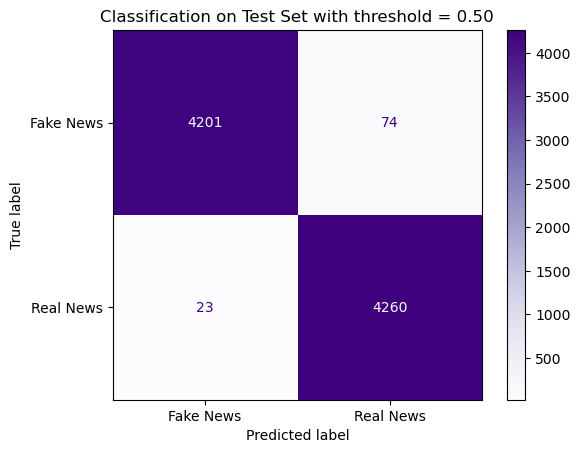

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

def show_confusion_matrix(y_true, predictions, threshold=0.5):
    labels = ['Fake News', 'Real News']

    fig = ConfusionMatrixDisplay.from_predictions(
        y_true, predictions, display_labels=labels, cmap=plt.cm.Purples, normalize=None)
    fig.ax_.set_title('Classification on Test Set with threshold = %.2f' %threshold)

show_confusion_matrix(y_test, predictions)

In [53]:
print("Number of samples in Test Set: %d" %y_test.shape[0])

Number of samples in Test Set: 8558


In [54]:
print("Accuracy on Test Set = %f%%" %(accuracy_score(y_pred=predictions, y_true=y_test) * 100))

Accuracy on Test Set = 98.866558%


In [55]:
print("Percentage of \"False\" samples misclassified out of the total misclassification errors = %f%%" %(74 / (74+23) * 100))
print("Percentage of \"True\" samples misclassified out of the total misclassification errors = %f%%" %(23 / (74+23) * 100))

Percentage of "False" samples misclassified out of the total misclassification errors = 76.288660%
Percentage of "True" samples misclassified out of the total misclassification errors = 23.711340%


## 4.2 Result with different threshold

A simple way to try to reduce misclassification errors is to change the threshold that determines which class a sample belongs to. 

Below is shown how predictions would change if a threshold of 0.7 was used, meaning that each label would be classified with a weight equal to the number of examples belonging to that class seen by the model during the training phase.

In this case, the model achieved an accuracy of over 99%.

In [56]:
filename = 'predictions/continuous_predictions.pkl'
with open(filename, 'rb') as file:
    [continuous_predictions] = pickle.load(file)

Accuracy reached = 99.135312%, with threshold = 0.7


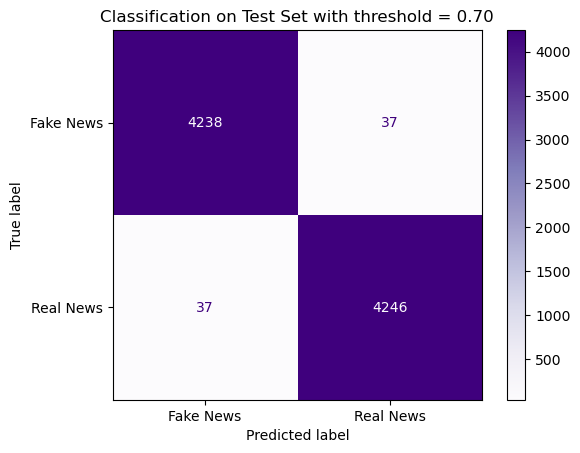

In [57]:
threshold = 0.7
new_pred = np.where(continuous_predictions < threshold, 0, 1)

print('Accuracy reached = %f%%, with threshold = %.1f' %(accuracy_score(
                y_pred=new_pred, y_true=y_test)*100, threshold))
show_confusion_matrix(y_test, new_pred, threshold)

To verify that the best accuracy is achieved with a threshold selected based on the number of examples belonging to each class, the accuracy on predictions is plotted as a function of the threshold in the range between 0.5 and 0.95.

As shown in the graph, the best accuracy is obtained with a threshold of 0.65, which is 99.147% compared to the previous one of 99.135%.

In this case, the misclassification errors are slightly higher on false labels classified as true, whereas with a threshold of 0.7, the classification errors were equal in both classes.

Highest accuracy reached = 99.146997%, with threshold = 0.650405


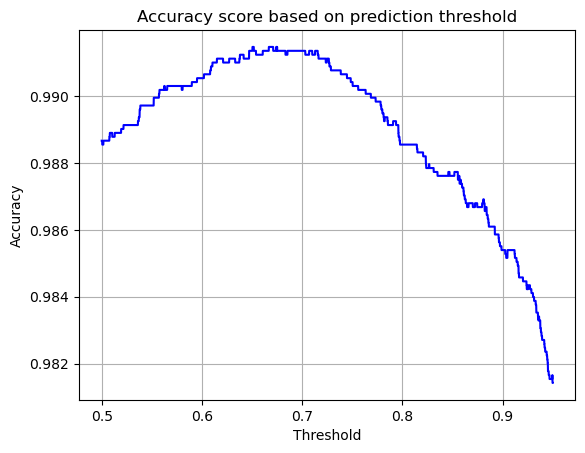

In [58]:
def show_accuracy_threshold_plot(continuous_predictions):
    thresholds = np.linspace(0.5, 0.95, 10000)
    new_predictions = np.where(continuous_predictions < thresholds, 0, 1)

    new_accuracy = []
    for pred in new_predictions.T: new_accuracy.append(accuracy_score(y_pred=pred, y_true=y_test))

    plt.plot(thresholds, new_accuracy, 'blue')
    plt.grid()
    plt.xlabel("Threshold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy score based on prediction threshold")

    max_accuracy = max(new_accuracy)
    max_threshold = thresholds[int(new_accuracy.index(max(new_accuracy)))]
    print('Highest accuracy reached = %f%%, with threshold = %f' %(max_accuracy*100, max_threshold))

    return max_accuracy, max_threshold

max_accuracy, max_threshold = show_accuracy_threshold_plot(continuous_predictions)

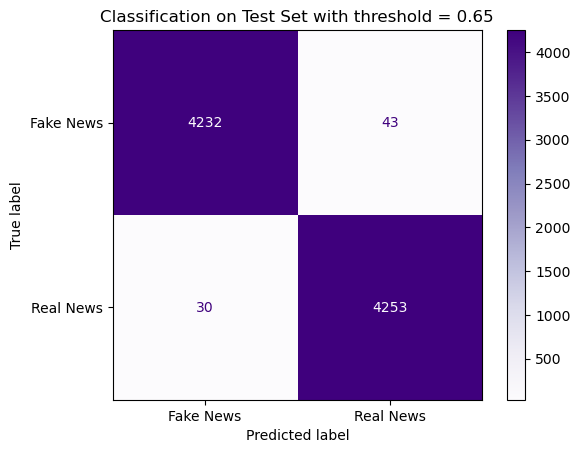

In [59]:
new_predictions = np.where(continuous_predictions < max_threshold, 0, 1)
show_confusion_matrix(y_test, new_predictions, max_threshold)

## 4.3 Results using Word2vec Embeddings

In order to compare the results of the final model with those one we may obtain from the same model using a different embedding, a new model was trained with the same parameters as the final model but using pre-processed Word2vec embedding provided by Google and downloaded using the Gensim library. 

The model was trained for 5 epochs, and the training phase lasted about 160 minutes, slower than the model using GloVe embeddings. 

The accuracy and loss for each epoch, the model and the final predictions on the Test Set, were saved in pickle files.

The learning curves are shown below.

In [60]:
from gensim.downloader import load

def dowload_word2vec_embeddings():
    # Download pre-trained Word2vec embeddings
    return load('word2vec-google-news-300')

def compute_word2vec_embeddings(tokenizer):
    word2vec_vectors = dowload_word2vec_embeddings()

    id_to_word = tokenizer.word_index # load word index vocabolary

    # create embeddings matrix
    word2vec_embeddings = []
    for word in id_to_word:
        try:
            word2vec_embeddings.append(word2vec_vectors[word])
        except: pass

    return np.array(word2vec_embeddings)

In [61]:
def save_word2vec_embeddings(tokenizer):
    word2vec_embeddings = compute_word2vec_embeddings(tokenizer=tokenizer)

    filename = 'pickles/word2vec.pkl'
    with open(filename, 'wb') as file:
        pickle.dump([word2vec_embeddings], file)

def load_word2vec_embeddings():
    filename = 'pickles/word2vec.pkl'
    with open(filename, 'rb') as file:
        [word2vec_embeddings] = pickle.load(file)
    
    return word2vec_embeddings

In [62]:
#save_word2vec_embeddings(tokenizer=tokenizer)

word2vec_embeddings = load_word2vec_embeddings()

In [63]:
word2vec_model = Bidirectional_LSTM(X_train_reduced, y_train, embeddings_matrix=word2vec_embeddings, n_hidden_units=[5], 
                            dropuot_fraction=0.2, epochs=5, batch_size=256)
            
#word2vec_model.train()

Epoch 1/5
29/29 [==============================] - 1124s 39s/step - loss: 0.5547 - accuracy: 0.7107 - val_loss: 0.4072 - val_accuracy: 0.8165
Epoch 2/5
29/29 [==============================] - 1662s 58s/step - loss: 0.3000 - accuracy: 0.9151 - val_loss: 0.2045 - val_accuracy: 0.9681
Epoch 3/5
29/29 [==============================] - 1969s 68s/step - loss: 0.1588 - accuracy: 0.9735 - val_loss: 0.1253 - val_accuracy: 0.9691
Epoch 4/5
29/29 [==============================] - 2646s 92s/step - loss: 0.0968 - accuracy: 0.9805 - val_loss: 0.0871 - val_accuracy: 0.9788
Epoch 5/5
98/98 [==============================] - 570s 6s/step - loss: 0.0585 - accuracy: 0.9897


In [101]:
def save_word2vec(word2vec_model):
    word2vec_model.save_model_history('models/word2vec_model.pkl')
    save_model(word2vec_model.model, filepath='word2vec_model')

    word2vec_predictions = word2vec_model.model.predict(X_test)

    with open('predictions/word2vec_predictions.pkl', 'wb') as file:
        pickle.dump([word2vec_predictions], file)


#save_word2vec(word2vec_model)

# load model and predictions
word2vec_history, [word2vec_eval_loss, word2vec_eval_accuracy] = load_model_history('models/word2vec_model.pkl')
word2vec_model = load_model(filepath='word2vec_model') 

with open('predictions/word2vec_predictions.pkl', 'rb') as file:
    [word2vec_predictions] = pickle.load(file)

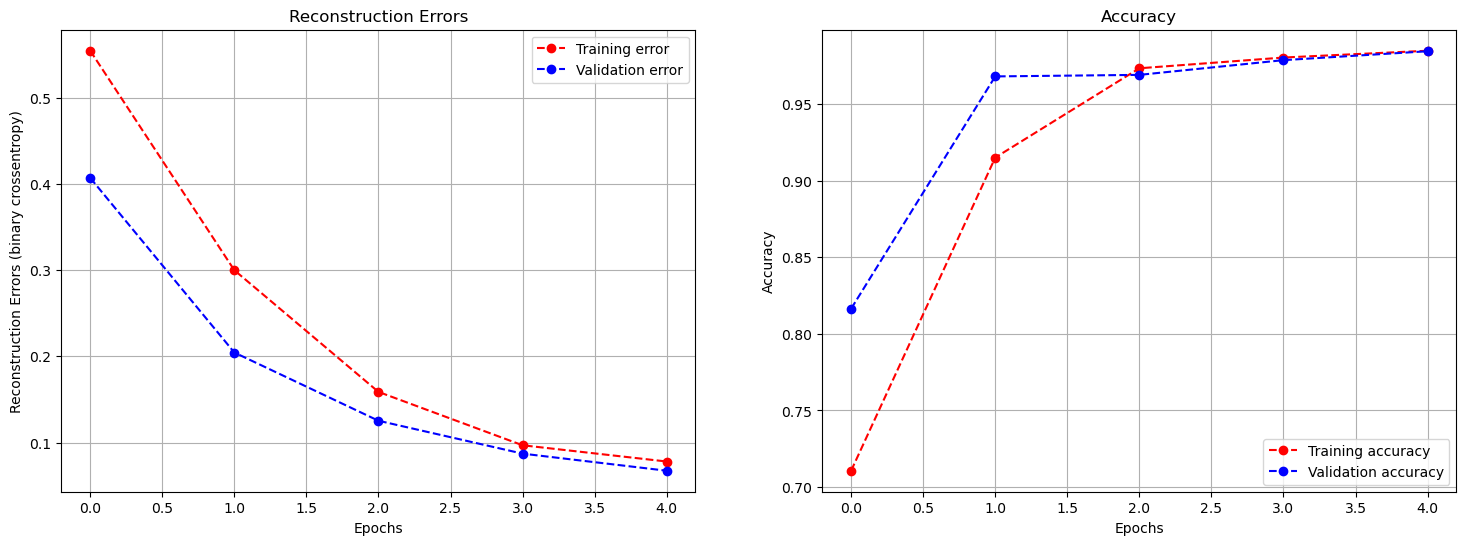

In [102]:
show_learning_curve(word2vec_history)

Below are the accuracies on Test Set predictions using a threshold of 0.5 and then 0.7 and their corresponding confusion matrices.

With both metrics, the model slightly underperformed the previous one, but note that this model was trained for fewer epochs.

Accuracy reached = 97.569526%, with threshold = 0.5


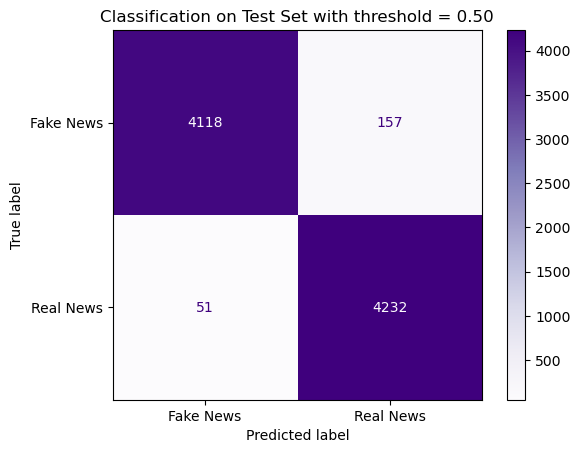

In [108]:
threshold = 0.5
word2vec_pred = np.where(word2vec_predictions < threshold, 0, 1)

print('Accuracy reached = %f%%, with threshold = %.1f' %(accuracy_score(
                y_pred=word2vec_pred, y_true=y_test)*100, threshold))
show_confusion_matrix(y_test, word2vec_pred, threshold=0.5)

Accuracy reached = 98.352419%, with threshold = 0.7


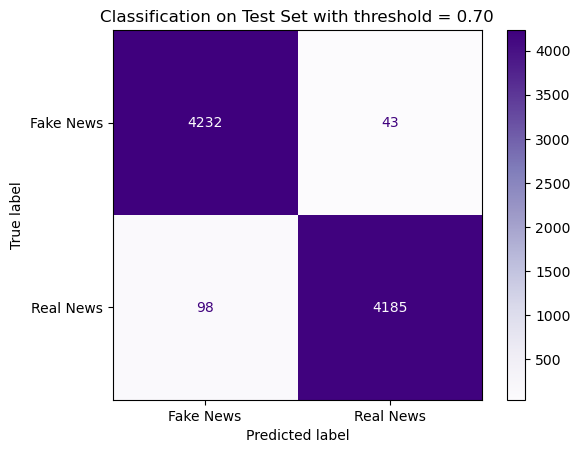

In [103]:
threshold = 0.7
new_word2vec_pred = np.where(continuous_word2vec_predictions < threshold, 0, 1)

print('Accuracy reached = %f%%, with threshold = %.1f' %(accuracy_score(
                y_pred=new_word2vec_pred, y_true=y_test)*100, threshold))
show_confusion_matrix(y_test, new_word2vec_pred, threshold)

# 5. Conclusion

The main challenge in this project was managing the large amount of data. The enormous size of the matrices made each epoch computation slow. Various solutions were tested to address this issue, such as reducing the matrix dimensionality using different libraries for decomposition. However, these methods, which were more elaborate than the chosen approach, did not yield better results. Even when varying the model architecture, preliminary tests did not seem to improve the training phase's speed. Ultimately, the optimal solution was to remove the last columns containing almost exclusively null values. This reduced the input matrix size by almost half.

Additionally, customizing the number of steps in the model using the Keras library, while still displaying all examples, helped speed up the training phase.

To ensure result reproducibility and avoid having to recompute everything each time the kernel restarted, slower steps were saved in pickls files.

Only four hyperparameter configurations were evaluated, and a true grid search was not performed. However, the results were already satisfactory, but probably a more detailed grid search, including different embeddings, may have produced slightly better results. Since the best results were reached with a single hidden layer, it could be interesting to try a model with more units in a single layer to see if there is an improvement in performance.

The training set was created with an imbalanced number of fake and real news. However, the chosen proportions may not represent the true proportions. It would be worth trying to train on a much larger number of true news. In this case, the threshold values for classification may need to be revised.

Multiple model initializations were not performed, but it would be good practice to do so.

This midterm enabled me to apply course knowledge and the preprocessing phase also utilized knowledge from other courses.